## Кластеризація

In [100]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [101]:
from sklearn.cluster import KMeans

In [102]:
wine = datasets.load_wine()

In [130]:
import pandas as pd

df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Визначимо найбільш значущі параметри за лопомогою дерева прийняття рішень

In [145]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = df_wine[['target']]
X = df_wine.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

print(f'accuracy_score = {metrics.accuracy_score(y_test, y_pred)}')

importance = clf_model.feature_importances_

sorted_imoptance = pd.DataFrame({'feature': list(X_train.columns), 'importance': importance}).sort_values('importance', ascending=False)
sorted_imoptance

accuracy_score = 0.9444444444444444


,feature,importance
6,flavanoids,0.438180
9,color_intensity,0.434816
12,proline,0.127004
0,alcohol,0.000000
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
7,nonflavanoid_phenols,0.000000


Найбільш значущими параметрами є flavanoids, color_intensity та (меншою мірою) proline.

## Метод k-середніх

In [195]:
model = KMeans(n_clusters=3)

In [196]:
model.fit(wine.data)

C:\Users\User\Desktop\Homework Python Data Science\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [197]:
predictions = model.predict(wine.data)

In [198]:
print(predictions)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [199]:
cluster_0 = wine.data[predictions == 0]
cluster_1 = wine.data[predictions == 1]
cluster_2 = wine.data[predictions == 2]

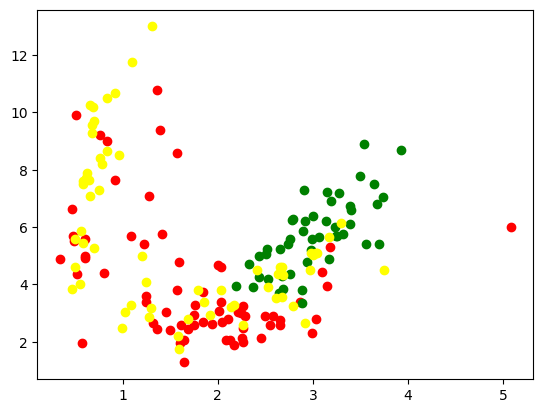

In [200]:
plt.scatter(cluster_0[:,6] , cluster_0[:,9] , color = 'red')
plt.scatter(cluster_1[:,6] , cluster_1[:,9] , color = 'green')
plt.scatter(cluster_2[:,6] , cluster_2[:,9] , color = 'yellow')

In [205]:
import plotly.express as px

y_pred = model.predict(wine.data)

wine = datasets.load_wine()
df = df_wine

  
fig = px.scatter_3d(df, x = 'flavanoids', 
                    y = 'color_intensity', 
                    z = 'proline',
                    color = y_pred)
  
fig.show()

In [202]:
import plotly.express as px

wine = datasets.load_wine()
df = df_wine

  
fig = px.scatter_3d(df, x = 'flavanoids', 
                    y = 'color_intensity', 
                    z = 'proline',
                    color = 'target')
  
fig.show()

Згідно з 3D графіків кластеризація методом k-середніх не дає точного результату (розподілення по target та y_pred не повністю співпадає).

## Метод DBSCAN

In [204]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [96]:
dbscan = DBSCAN(eps=40, min_samples=4)

In [97]:
dbscan.fit(wine.data)

DBSCAN(eps=40, min_samples=4)

In [98]:
pca = PCA(n_components=2).fit(wine.data)
pca_2d = pca.transform(wine.data)

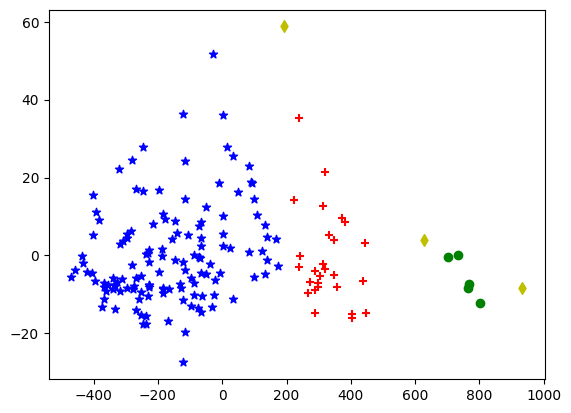

In [99]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

Згідно графіку найбільш оптимальною відстанню для даної виірки значень для побудови моделі DBSCAN є eps=40.

In [83]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [35]:
mergings = linkage(wine.data, method = 'complete')

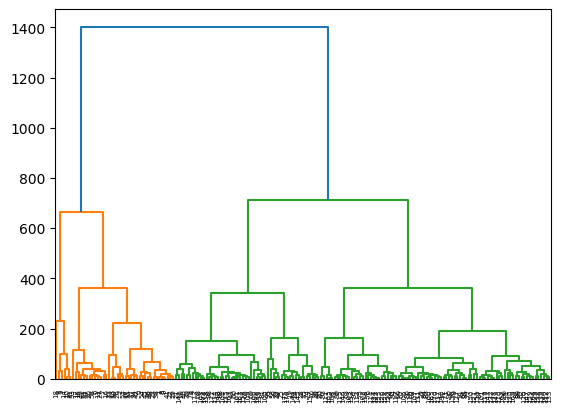

In [36]:
clusters = dendrogram(mergings,leaf_rotation=90)